In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (15,8)

In [32]:
df = pd.read_csv("Python_Clustering_Pr (1).csv")
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [33]:
df.isna().any()

Gender                             False
Chain_smoker                       False
Consumes_other_tobacco_products    False
HighBP                             False
Obese                              False
Diabetes                           False
Metabolic_syndrome                 False
Use_of_stimulant_drugs             False
Family_history                     False
History_of_preeclampsia            False
CABG_history                       False
Respiratory_illness                False
UnderRisk                          False
dtype: bool

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,889.0,1.258718,0.500557,0.0,1.0,1.0,2.0,2.0
Chain_smoker,889.0,0.120360,0.325565,0.0,0.0,0.0,0.0,1.0
Consumes_other_tobacco_products,889.0,0.838020,0.368640,0.0,1.0,1.0,1.0,1.0
HighBP,889.0,0.086614,0.281427,0.0,0.0,0.0,0.0,1.0
Obese,889.0,0.919010,0.272973,0.0,1.0,1.0,1.0,1.0
Diabetes,889.0,0.055118,0.228339,0.0,0.0,0.0,0.0,1.0
Metabolic_syndrome,889.0,0.042745,0.202395,0.0,0.0,0.0,0.0,1.0
Use_of_stimulant_drugs,889.0,0.082115,0.274694,0.0,0.0,0.0,0.0,1.0
Family_history,889.0,0.925759,0.262310,0.0,1.0,1.0,1.0,1.0
History_of_preeclampsia,889.0,0.017998,0.133018,0.0,0.0,0.0,0.0,1.0


In [36]:
df.UnderRisk.value_counts()

no     699
yes    190
Name: UnderRisk, dtype: int64

In [37]:
df1 = df.drop(['UnderRisk'], axis=1)

In [38]:
from sklearn.cluster import KMeans

In [39]:
km = KMeans(n_clusters=2)

In [40]:
y_predicted = km.fit_predict(df1)
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [41]:
print(km.cluster_centers_)

[[9.58925750e-01 1.43759874e-01 8.10426540e-01 9.63665087e-02
  9.14691943e-01 6.63507109e-02 5.21327014e-02 8.53080569e-02
  9.19431280e-01 2.52764613e-02 2.68562401e-02 3.00157978e-02]
 [2.00000000e+00 6.25000000e-02 9.06250000e-01 6.25000000e-02
  9.29687500e-01 2.73437500e-02 1.95312500e-02 7.42187500e-02
  9.41406250e-01 1.04083409e-17 7.81250000e-03 3.90625000e-02]]


In [42]:
df1['cluster']=y_predicted
df1.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0


In [43]:
## Checking Score
from sklearn.metrics import silhouette_score
score = silhouette_score(df1, y_predicted)
score

0.4981285637165637

In [44]:
krng = range(1,11)
wcss = []
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

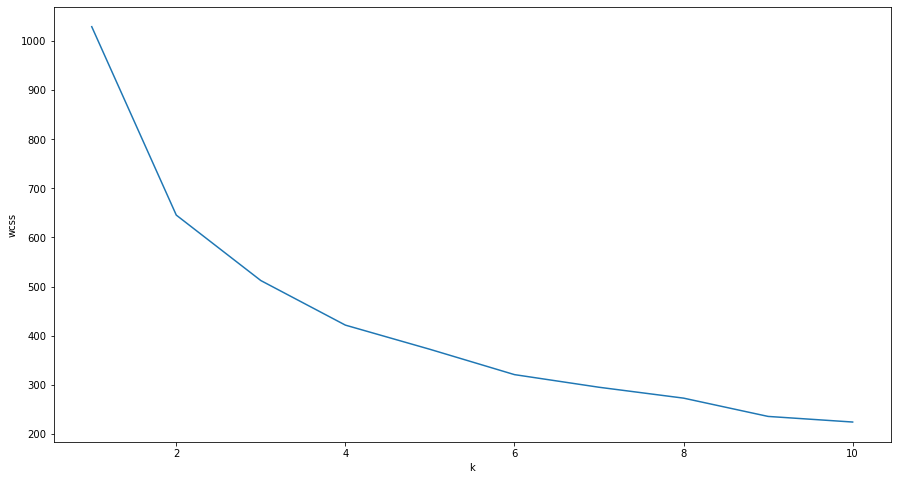

In [45]:
plt.xlabel('k')
plt.ylabel('wcss')
plt.plot(krng, wcss)

In [46]:
wcss

[1029.2125984251961,
 645.4620853080567,
 512.1503710746646,
 421.3916562094895,
 372.138940599155,
 320.5737652997435,
 294.8505619877458,
 272.68929139089676,
 235.44064282385432,
 224.01527857785533]

## hierarchical clustering

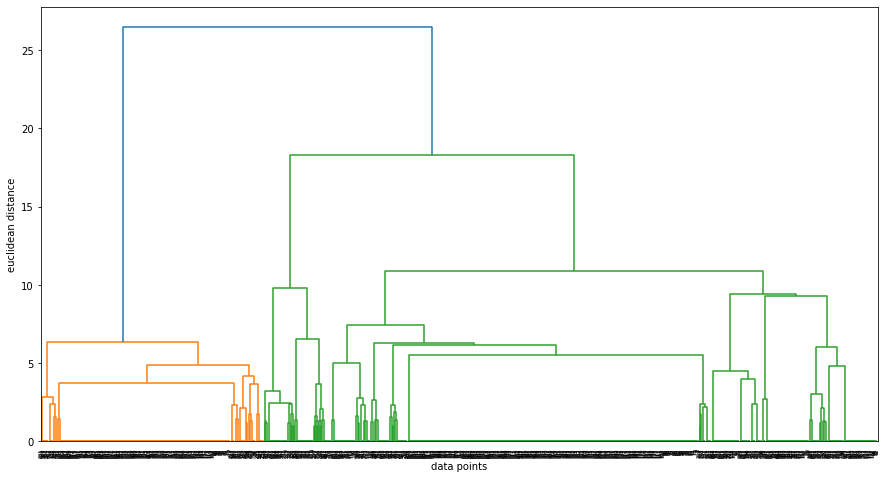

In [47]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df1, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df1)

In [50]:
df1["label"] = cluster

In [51]:
df1.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster,label
0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [52]:
df1.label.value_counts()

0    652
1    237
Name: label, dtype: int64

In [53]:
score = silhouette_score(df1, cluster)
score

0.5439328767507601